## Compare the changes in number of parameters and accuracy on MNIST dataset by applying ANN  and CNN.

In [3]:
import keras,tensorflow
import numpy as np
import matplotlib.pyplot as plt

In [5]:
tensorflow.keras.datasets.mnist.load_data?

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [68]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D

### ANN

In [28]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [29]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='acc')

In [52]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0165 - acc: 0.9951 - val_loss: 0.0722 - val_acc: 0.9793
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0159 - acc: 0.9953 - val_loss: 0.0746 - val_acc: 0.9809
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0125 - acc: 0.9966 - val_loss: 0.0777 - val_acc: 0.9794
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0123 - acc: 0.9965 - val_loss: 0.0772 - val_acc: 0.9803
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0095 - acc: 0.9974 - val_loss: 0.0801 - val_acc: 0.9789
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0107 - acc: 0.9968 - val_loss: 0.0743 - val_acc: 0.9813
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0085 - acc: 0.9974 - val_loss: 0.0811 - val_acc: 0.9798
Epoch 8/10
1875/1875 [==============================] - 16s 9

In [31]:
_,acc1 = model.evaluate(x_train,y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0154 - acc: 0.9954


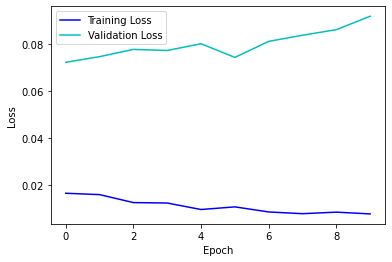

In [53]:
plt.plot(history.history['loss'],c='b',label='Training Loss')
plt.plot(history.history['val_loss'],c='c',label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

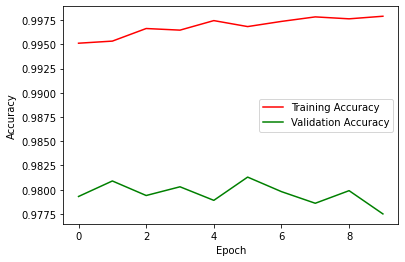

In [56]:
plt.plot(history.history['acc'],c='r',label='Training Accuracy')
plt.plot(history.history['val_acc'],c='g',label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### CNN

In [78]:
x_train.shape

(60000, 28, 28, 1)

In [77]:
x_train = x_train.reshape((x_train.shape[0],28,28,1)).astype('float32')
x_test = x_test.reshape((x_test.shape[0],28,28,1)).astype('float32')

In [79]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(2,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [80]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='acc')

In [81]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.3719 - acc: 0.9080 - val_loss: 0.1250 - val_acc: 0.9640
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1181 - acc: 0.9651 - val_loss: 0.0930 - val_acc: 0.9715
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0888 - acc: 0.9730 - val_loss: 0.0708 - val_acc: 0.9785
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0757 - acc: 0.9769 - val_loss: 0.0681 - val_acc: 0.9777
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0658 - acc: 0.9796 - val_loss: 0.0606 - val_acc: 0.9809
Epoch 6/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0593 - acc: 0.9813 - val_loss: 0.0664 - val_acc: 0.9801
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0532 - acc: 0.9831 - val_loss: 0.0607 - val_acc: 0.9809
Epoch 8/10
1875/1875 [==========================

In [82]:
_,acc2 = model.evaluate(x_train,y_train)

1875/1875 [==============================] - 20s 10ms/step - loss: 0.0257 - acc: 0.9922


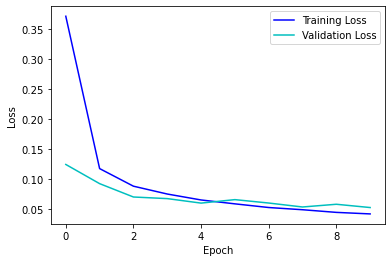

In [83]:
plt.plot(history.history['loss'],c='b',label='Training Loss')
plt.plot(history.history['val_loss'],c='c',label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

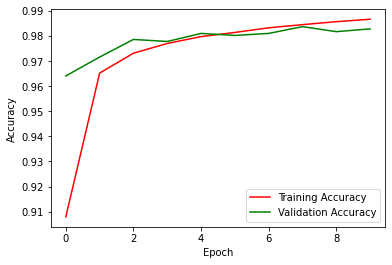

In [84]:
plt.plot(history.history['acc'],c='r',label='Training Accuracy')
plt.plot(history.history['val_acc'],c='g',label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()